In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import random
import os

In [ ]:
def cropped_petri_dish(img):

    # Finding threshold to isolate the region of interest
    _, output = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 50, 60, cv2.THRESH_BINARY)

    # Removing noise from the image
    output = cv2.medianBlur(output, 15)
    kernel = np.ones((9, 9), dtype="uint8")
    output = cv2.erode(output, kernel, iterations=2)
    output = cv2.dilate(output, kernel, iterations=2)

    # Finding components
    _, _, stats, _ = cv2.connectedComponentsWithStats(output)

    # filtering the statistics to get the right object
    # limitations on x: discard the background and other artifacts
    # limitations on w/h (width/height): discard small objects
    df = pd.DataFrame(stats, columns=['x', 'y', 'w', 'h', 'area']).sort_values('area', ascending=False)
    df = df[df['x'] > 0]
    df = df[df['x'] < 4000]
    df = df[df['h'] > 1000]
    df = df[df['w'] > 1000]

    # get the statistics for the filtered object
    x, y, w, h, _ = np.array(df.head(1))[0]

    # crop the image
    im_cropped = img[y:y + min(w, h), x:x + min(w, h)]

    # get the x, y coordinates of the cropped image as well as the width/height
    dims = {'x': x, 'y': y, 'size': min(w, h)}
    
    return im_cropped, dims

In [4]:
# Define the folder path of the images
folder_path_23 = '/Volumes/T7/Artificial Intelligence/YEAR 2.1/Block B retake/dataset23/train_img/train'  
folder_path_24 = '/Volumes/T7/Artificial Intelligence/YEAR 2.1/Block B retake/dataset24/train_img'


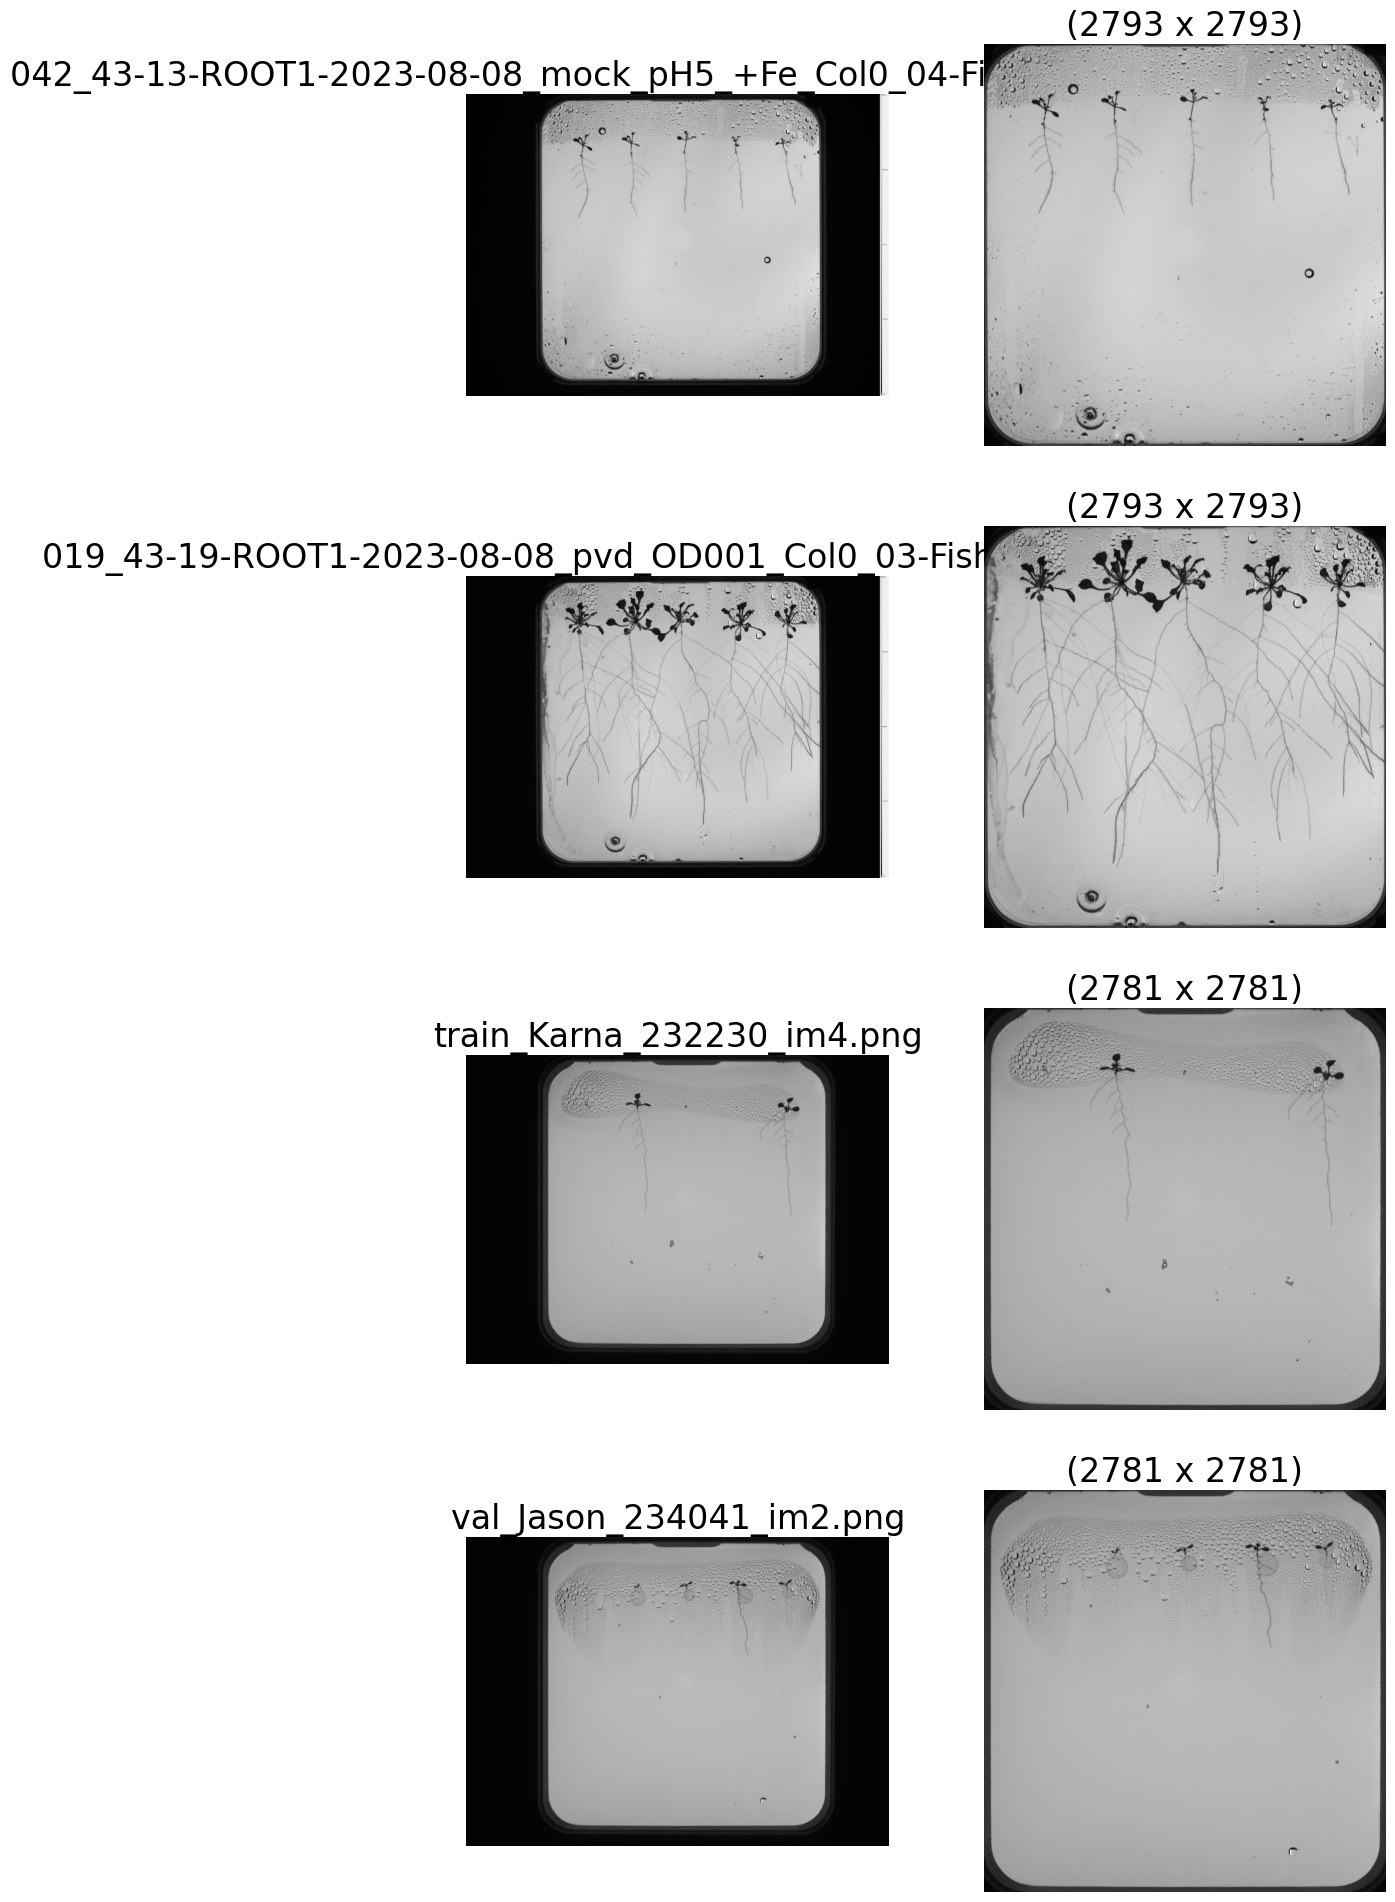

In [ ]:
# Prepare to store images and their details
num_images = 2
orig_imgs = []
cropped_imgs = []
file_names = []
shapes = []

# Load random images from Y2B_23
image_files_23 = [f for f in os.listdir(folder_path_23) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
selected_23 = random.sample(image_files_23, num_images)
for fname in selected_23:
    img_path = os.path.join(folder_path_23, fname)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cropped, _ = cropped_petri_dish(img_rgb)
    orig_imgs.append(img_rgb)
    cropped_imgs.append(cropped)
    file_names.append(fname)
    shapes.append((img_rgb.shape[:2], cropped.shape[:2]))

# Load random images from Y2B_24
image_files_24 = [f for f in os.listdir(folder_path_24) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
selected_24 = random.sample(image_files_24, num_images)
for fname in selected_24:
    img_path = os.path.join(folder_path_24, fname)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cropped, _ = cropped_petri_dish(img_rgb)
    orig_imgs.append(img_rgb)
    cropped_imgs.append(cropped)
    file_names.append(fname)
    shapes.append((img_rgb.shape[:2], cropped.shape[:2]))

# Plot originals and cropped images
fig, axs = plt.subplots(4, 2, figsize=(12, 24))

for i in range(4):
    # Original image with filename
    axs[i, 0].imshow(orig_imgs[i])
    axs[i, 0].set_title(file_names[i], fontsize=24)
    axs[i, 0].axis('off')
    axs[i, 0].set_aspect('equal')

    # Cropped image with dimensions
    axs[i, 1].imshow(cropped_imgs[i])
    crop_shape = shapes[i][1]   # (height, width)
    axs[i, 1].set_title(f"({crop_shape[0]} x {crop_shape[1]})", fontsize=24)
    axs[i, 1].axis('off')
    axs[i, 1].set_aspect('equal')

plt.show()
